<a href="https://colab.research.google.com/github/KaustubhK94/OCR_based_machine_translation_de-en/blob/main/OCR_Machine_translation_de-en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-deu

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-deu is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [3]:
# !sudo apt-get install fonts-dejavu-core

In [4]:
!pip install flask

In [5]:
!pip install transformers datasets evaluate

In [6]:
!pip install sentencepiece

In [7]:
import pytesseract
print("Available languages:", pytesseract.get_languages(config=""))

# You should see 'deu' (German) in the list of available languages


Available languages: ['deu', 'eng', 'osd']


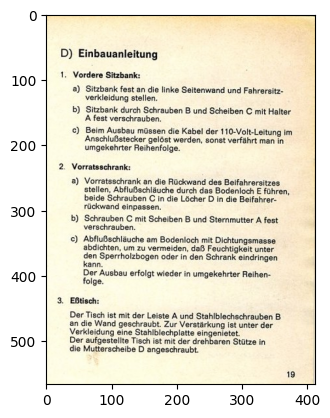

In [8]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt


image = Image.open('/content/drive/MyDrive/Colab Notebooks/page19.jpg')

extracted_text = pytesseract.image_to_string(image, lang='deu')

plt.imshow(image)

In [9]:
print(extracted_text)

 

D) Einbauanleitung

1. Vordere Sitzbank:

a) Sitzbank fest an die linke Seitenwand und Fahrersitz-
verkleidung stellen.

b). Sitzbank durch Schrauben B und Scheiben C mit Halter
A fest verschrauben.

©) Beim Ausbau müssen die Kabel der 110-Volt-Leitung im
‚Anschlußstecker gelöst werden, sonst verfährt man in
umgekehrter Reihenfolge.

2. Vorratsschrank:

@) Vorratsschrank an die Rückwand des Beifahrersitzes
stellen, Abflußschläuche durch das Bodenloch E führen,
beide Schrauben C in die Löcher ie Beifahrer-
rückwand einpassen.

b) Schrauben C mit Scheiben B und Sternmutter A fest
verschrauben.

©) Abflußschläuche am Bodenloch mit Dichtungsmasse
abdichten, um zu vermeiden, daß Feuchtigkeit u
den Sperrholzbogen oder in den Schrank eindringen
kann.

r Ausbau erfolgt wieder in umgekehrter Reihen-

folge.

  

 

3. EBtisch:

Der Tisch ist mit der Leiste A und Stahlblechschrauben B
an die Wand geschraubt. Zur Verstärkung Ist unter der
Verkleidung eine Stahlblechplatte eingenietet,

Der auf

In [10]:
from transformers import MarianTokenizer, MarianMTModel

# Load the tokenizer and model
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-de-en")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-de-en")

# Tokenize the text
inputs = tokenizer(extracted_text, return_tensors="pt")

# Translate from German to English
translation = model.generate(**inputs)

# Decode and print the translation
translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [11]:
translated_text = "\n".join(translated_text)
print(translated_text)

D) Installation instructions 1. Front seat: a) Place the seat firmly on the left side wall and driver's seat cover. b) Screw the seat with screws B and discs C with holder A firmly. ©) When removing the cables of the 110 volt line in the ‘connector plug, otherwise you proceed in reverse order. 2. Storage cabinet: @) Place the storage cabinet on the rear wall of the passenger seat, guide drain hoses through the bottom hole E, fit both screws C into the holes he passenger back wall. b) Screws C with discs B and star nut A firmly screw the outlet hoses on the bottom hole with sealing compound to prevent moisture and the plywood arc or into the cabinet. r Extension is carried out again in reverse row sequence. 3. EB table: The table is screwed to the wall with the latch A and steel sheet screws B. For amplification If a steel sheet plate is inserted under the cover, the table is mounted with the inverted support screw.


In [12]:
translated_text = translated_text.replace(". ", "\n")
print(translated_text)

D) Installation instructions 1
Front seat: a) Place the seat firmly on the left side wall and driver's seat cover
b) Screw the seat with screws B and discs C with holder A firmly
©) When removing the cables of the 110 volt line in the ‘connector plug, otherwise you proceed in reverse order
2
Storage cabinet: @) Place the storage cabinet on the rear wall of the passenger seat, guide drain hoses through the bottom hole E, fit both screws C into the holes he passenger back wall
b) Screws C with discs B and star nut A firmly screw the outlet hoses on the bottom hole with sealing compound to prevent moisture and the plywood arc or into the cabinet
r Extension is carried out again in reverse row sequence
3
EB table: The table is screwed to the wall with the latch A and steel sheet screws B
For amplification If a steel sheet plate is inserted under the cover, the table is mounted with the inverted support screw.


In [13]:
!mkdir uploads

mkdir: cannot create directory ‘uploads’: File exists


In [26]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://0m8mgfs0mac-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [27]:
import os
from flask import Flask, render_template, request, redirect, url_for, send_from_directory
from transformers import MarianTokenizer, MarianMTModel
from PIL import Image
import re
import pytesseract

app = Flask(__name__, template_folder='/content/drive/MyDrive/OCR_Translation/templates')

# Define the path for uploading and serving images
UPLOAD_FOLDER = '/content/drive/MyDrive/OCR_Translation/static/uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load the translation model and tokenizer
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-de-en")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-de-en")

# Function to translate text
def translate_text(input_text):
    inputs = tokenizer(input_text, return_tensors="pt")
    translation = model.generate(**inputs)
    translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)
     # Tokenize into sentences and join with HTML line breaks
    translated_text = "\n".join(translated_text)
    translated_text = translated_text.replace(". ", "\n")
    return translated_text

# Function to perform OCR on an image
def perform_ocr(image_path):
    # Open the image using PIL
    image = Image.open(image_path)

    # Perform OCR using pytesseract
    extracted_text = pytesseract.image_to_string(image, lang='deu')

    return extracted_text

@app.route("/", methods=["GET", "POST"])
def index():
    translated_text = ""

    if request.method == "POST":
        # Check if a file was uploaded
        if 'file' not in request.files:
            return redirect(request.url)

        file = request.files['file']

        # If the user does not select a file, the browser will submit an empty file
        if file.filename == '':
            return redirect(request.url)

        if file:
            # Save the uploaded image to the upload folder
            filename = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
            file.save(filename)

            # Perform OCR on the uploaded image
            extracted_text = perform_ocr(filename)

            # Translate the extracted text and replace newlines with HTML line breaks
            translated_text = translate_text(extracted_text).replace("\n", "<br>")

    return render_template("index.html", translated_text=translated_text)

@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return send_from_directory(app.config['UPLOAD_FOLDER'], filename)

if __name__ == "__main__":
    app.run()


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Oct/2023 06:13:59] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Oct/2023 06:13:59] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Oct/2023 06:14:22] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Oct/2023 06:14:23] "GET /favicon.ico HTTP/1.1" 404 -
